In [13]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import hvplot.pandas

%matplotlib inline

In [14]:
btc_data = Path("3btc 3 data - Sheet1.csv")
btc = pd.read_csv(btc_data)
btc.sort_index(inplace=True)

In [15]:
eth_data = Path("3eth daily closes for 3 years - Sheet1.csv")
eth = pd.read_csv(eth_data)
eth.sort_index(inplace=True)

In [16]:
sp500_data = Path("4SANDP500 - Sheet1.csv")
sp500 = pd.read_csv(sp500_data)
sp500.sort_index(inplace=True)

In [17]:
hex_data = Path("hex-data - Sheet1.csv")
hexx = pd.read_csv(hex_data)
hexx.sort_index(inplace=True)

In [18]:
eth.columns=["Date", "ETH"]
btc.columns=["Delete", "BTC"]
sp500.columns=["Del", "SP500"]
hexx.columns=["D1", "HEX"]

In [20]:
btc.drop(columns=["Delete"], inplace=True)
sp500.drop(columns=["Del"], inplace=True)
hexx.drop(columns=["D1"], inplace=True)

In [23]:
df = pd.concat([eth, btc, sp500, hexx], axis="columns", join="inner")
df.head(100)

,Date,ETH,BTC,SP500,HEX
0,10/23/2019 23:58:00,161.57,7474.85,3004.52,0.000015
1,10/24/2019 23:58:00,160.67,7430.87,3010.29,0.000093
2,10/25/2019 23:58:00,181.66,8668.00,3022.55,0.000054
3,10/26/2019 23:58:00,180.03,9259.78,3039.42,0.000109
4,10/27/2019 23:58:00,184.41,9548.84,3036.89,0.000095
...,...,...,...,...,...
95,1/26/2020 23:58:00,167.35,8595.00,2741.38,0.284177
96,1/27/2020 23:58:00,169.77,8895.95,2480.64,0.325211
97,1/28/2020 23:58:00,175.77,9394.50,2711.02,0.232539
98,1/29/2020 23:58:00,173.40,9290.62,2386.13,0.175281


In [24]:
df.set_index(pd.to_datetime(df["Date"], infer_datetime_format=True), inplace = True)
df.drop(columns=["Date"], inplace=True)
df

,ETH,BTC,SP500,HEX
Date,,,,
2019-10-23 23:58:00,161.57,7474.85,3004.52,0.000015
2019-10-24 23:58:00,160.67,7430.87,3010.29,0.000093
2019-10-25 23:58:00,181.66,8668.00,3022.55,0.000054
2019-10-26 23:58:00,180.03,9259.78,3039.42,0.000109
2019-10-27 23:58:00,184.41,9548.84,3036.89,0.000095
...,...,...,...,...
2020-03-17 23:58:00,116.09,5331.72,2955.45,0.033426
2020-03-18 23:58:00,118.60,5413.64,2991.77,0.031750
2020-03-19 23:58:00,136.68,6186.95,3036.13,0.035507


<AxesSubplot:xlabel='Date'>

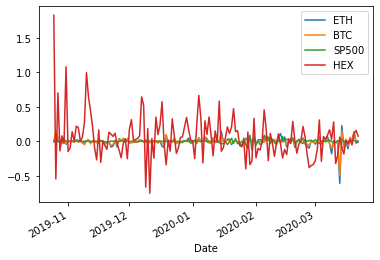

In [26]:
df_pct_change = df.pct_change()
df_log_return = np.log(1 + df_pct_change)
df_log_return.plot()

In [27]:
df_daily_returns = df.pct_change().dropna()
df_daily_returns.tail()

,ETH,BTC,SP500,HEX
Date,,,,
2020-03-17 23:58:00,0.047555,0.061250,0.002354,0.030585
2020-03-18 23:58:00,0.021621,0.015365,0.012289,-0.050141
2020-03-19 23:58:00,0.152445,0.142845,0.014827,0.118331
2020-03-20 23:58:00,-0.024949,0.002370,-0.002108,0.171572
2020-03-21 23:58:00,-0.008704,-0.000456,0.004812,0.078351


<AxesSubplot:xlabel='Date'>

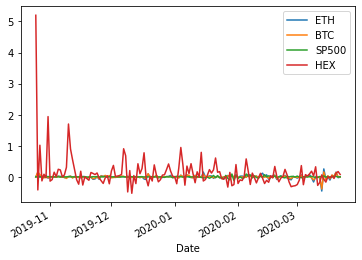

In [28]:
df_daily_returns.plot(kind="line")

<AxesSubplot:xlabel='Date'>

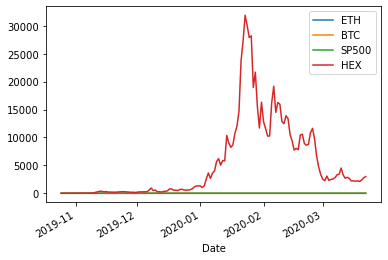

In [29]:
df_cumulative_returns = (1 + df_daily_returns).cumprod()
df_cumulative_returns.plot()

<AxesSubplot:>

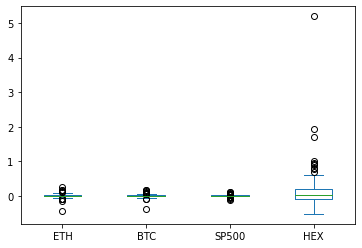

In [30]:
df_daily_returns.plot(kind="box")

In [31]:
all_stds = df_daily_returns.std()
all_stds

ETH      0.061371
BTC      0.049073
SP500    0.025683
HEX      0.538028
dtype: float64

In [32]:
volatility = all_stds * np.sqrt(365)
volatility

ETH       1.172497
BTC       0.937537
SP500     0.490673
HEX      10.279012
dtype: float64

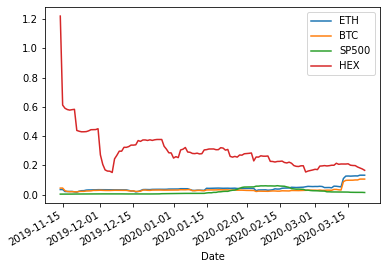

In [33]:
rolling_21 = df_daily_returns.rolling(window=21).std().plot()

<AxesSubplot:>

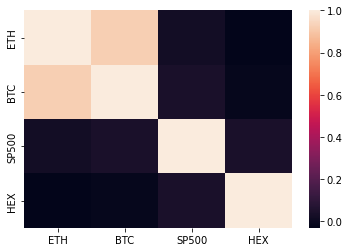

In [34]:
correlation = df_daily_returns.corr()
sns.heatmap(correlation)

<AxesSubplot:title={'center':'HEX 21-Day Rolling Covariance vs SP500'}, xlabel='Date'>

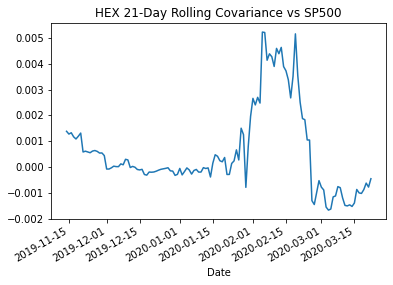

In [35]:
covariance = df_daily_returns['HEX'].cov(df_daily_returns['SP500'])
variance = df_daily_returns['SP500'].var()
HEX_beta = covariance / variance
rolling_covariance = df_daily_returns['HEX'].rolling(window=21).cov(df_daily_returns['SP500'])
rolling_covariance.plot(title="HEX 21-Day Rolling Covariance vs SP500")

<AxesSubplot:title={'center':'HEX 21-Day Rolling Covariance vs ETH'}, xlabel='Date'>

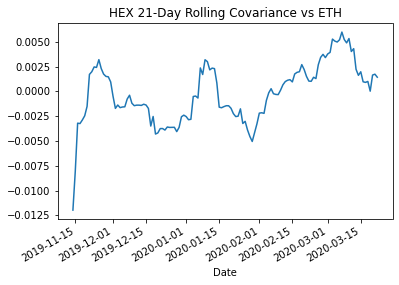

In [36]:
covariance2 = df_daily_returns['HEX'].cov(df_daily_returns['ETH'])
variance2 = df_daily_returns['ETH'].var()
HEX_beta2 = covariance2 / variance2
rolling_covariance2 = df_daily_returns['HEX'].rolling(window=21).cov(df_daily_returns['ETH'])
rolling_covariance2.plot(title="HEX 21-Day Rolling Covariance vs ETH")

<AxesSubplot:xlabel='Date'>

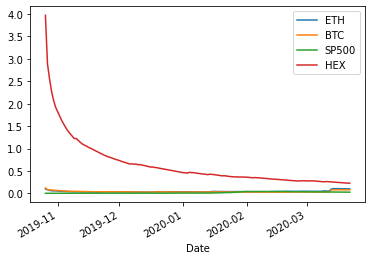

In [37]:
ewm = df_daily_returns.ewm(halflife=21).std().dropna()
ewm.plot()

In [38]:
sharpe_ratios = ((df_daily_returns.mean()-df_daily_returns['SP500'].mean()) * 365) / (df_daily_returns.std() * np.sqrt(365))
sharpe_ratios

ETH      0.123033
BTC     -0.120343
SP500    0.000000
HEX      4.189897
dtype: float64

<AxesSubplot:>

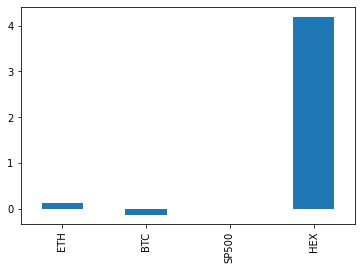

In [39]:
sharpe_ratios.plot(kind="bar")